In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df=pd.read_excel('family_financial_and_transactions_data.xlsx')

In [35]:
df.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68


In [36]:
df.tail()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
16301,FAM200,FAM200_Member6,2024-10-10,Groceries,79.99,44621,44081,4296,2470,2831,4,92
16302,FAM200,FAM200_Member6,2024-10-22,Education,228.39,44621,44081,4296,2470,2831,4,92
16303,FAM200,FAM200_Member6,2024-10-29,Travel,258.63,44621,44081,4296,2470,2831,4,92
16304,FAM200,FAM200_Member6,2024-10-26,Travel,467.46,44621,44081,4296,2470,2831,4,92
16305,FAM200,FAM200_Member6,2024-10-27,Entertainment,475.34,44621,44081,4296,2470,2831,4,92


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Family ID                16306 non-null  object        
 1   Member ID                16306 non-null  object        
 2   Transaction Date         16306 non-null  datetime64[ns]
 3   Category                 16306 non-null  object        
 4   Amount                   16306 non-null  float64       
 5   Income                   16306 non-null  int64         
 6   Savings                  16306 non-null  int64         
 7   Monthly Expenses         16306 non-null  int64         
 8   Loan Payments            16306 non-null  int64         
 9   Credit Card Spending     16306 non-null  int64         
 10  Dependents               16306 non-null  int64         
 11  Financial Goals Met (%)  16306 non-null  int64         
dtypes: datetime64[ns](1), float64(1)

In [38]:
df.describe()

,Transaction Date,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
count,16306,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000
mean,2024-10-16 00:34:31.777259776,256.368534,90340.503925,24473.998038,3948.522384,2529.978965,1782.880535,3.201521,59.418006
min,2024-10-01 00:00:00,10.030000,30851.000000,1037.000000,1013.000000,3.000000,510.000000,0.000000,21.000000
25%,2024-10-08 00:00:00,134.820000,59871.000000,11016.000000,2582.000000,1390.000000,1221.000000,2.000000,37.000000
50%,2024-10-16 00:00:00,256.055000,90142.000000,25504.000000,3721.000000,2548.000000,1705.000000,3.000000,58.000000
75%,2024-10-24 00:00:00,379.240000,119733.000000,37422.000000,5450.000000,3724.000000,2422.000000,4.000000,79.000000
max,2024-10-31 00:00:00,499.910000,149871.000000,49217.000000,6968.000000,4974.000000,2999.000000,5.000000,100.000000
std,NaN,141.153813,34740.834136,14828.955695,1689.987801,1384.105561,716.595101,1.468880,23.444304


In [39]:
df.nunique()

Family ID                    200
Member ID                    926
Transaction Date              31
Category                       7
Amount                     13907
Income                       200
Savings                      200
Monthly Expenses             198
Loan Payments                193
Credit Card Spending         196
Dependents                     6
Financial Goals Met (%)       74
dtype: int64

In [40]:
df.groupby('Family ID')['Transaction Date'].count()

Family ID
FAM001     93
FAM002     88
FAM003     47
FAM004     95
FAM005    165
         ... 
FAM196    124
FAM197     19
FAM198     76
FAM199    117
FAM200    104
Name: Transaction Date, Length: 200, dtype: int64

In [41]:
family_spending = df.groupby(['Family ID']).agg({
    'Amount':'sum',
    'Income': 'mean',
    'Savings': 'mean',
    'Monthly Expenses': 'mean',
    'Loan Payments': 'mean',
    'Credit Card Spending': 'mean',
    'Financial Goals Met (%)': 'mean'
}).reset_index()

family_spending.head()

,Family ID,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Financial Goals Met (%)
0,FAM001,23188.90,113810.0,20234.0,5781.0,2422.0,2959.0,68.0
1,FAM002,22309.71,44592.0,29492.0,5630.0,4541.0,995.0,60.0
2,FAM003,11220.34,33278.0,11365.0,5282.0,1042.0,2818.0,100.0
3,FAM004,23483.10,127196.0,30735.0,3591.0,1571.0,668.0,82.0
4,FAM005,40246.21,66048.0,1212.0,3136.0,3444.0,1922.0,89.0


In [42]:
# Calculate travel and entertainment spending for each family
travel_entertainment_spending = df[df['Category'].isin(['Travel', 'Entertainment'])].groupby('Family ID')['Amount'].sum().reset_index()
travel_entertainment_spending.rename(columns={'Amount': 'Travel & Entertainment Expenses'}, inplace=True)

# Merge with family_spending
family_spending = pd.merge(family_spending, travel_entertainment_spending, on='Family ID', how='left')

In [43]:
df['Category'].unique()

array(['Travel', 'Groceries', 'Healthcare', 'Education', 'Utilities',
       'Food', 'Entertainment'], dtype=object)

In [44]:
family_spending.sort_values(by='Amount', ascending=False)

,Family ID,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Financial Goals Met (%),Travel & Entertainment Expenses
49,FAM050,43880.14,74118.0,40753.0,2100.0,1208.0,1645.0,79.0,14567.93
193,FAM194,41655.65,100381.0,38940.0,3460.0,3249.0,1082.0,96.0,11689.11
4,FAM005,40246.21,66048.0,1212.0,3136.0,3444.0,1922.0,89.0,11420.90
186,FAM187,40052.84,142824.0,5453.0,6441.0,2548.0,1310.0,70.0,11908.77
80,FAM081,37314.40,116673.0,4858.0,4619.0,3969.0,1854.0,83.0,9010.76
...,...,...,...,...,...,...,...,...,...
74,FAM075,6379.00,77400.0,39564.0,1029.0,3888.0,2438.0,70.0,1101.49
179,FAM180,6351.33,80432.0,11317.0,6626.0,2099.0,1680.0,50.0,676.83
21,FAM022,6328.20,60495.0,36348.0,6088.0,3622.0,2637.0,61.0,2102.55
173,FAM174,4702.76,50969.0,4746.0,1363.0,1034.0,2345.0,55.0,998.45


In [45]:
family_member_spending = df.groupby(['Family ID','Member ID']).agg({
    'Amount':'sum',
}).reset_index()

family_member_spending.head()

,Family ID,Member ID,Amount
0,FAM001,FAM001_Member1,6521.20
1,FAM001,FAM001_Member2,7084.83
2,FAM001,FAM001_Member3,2119.41
3,FAM001,FAM001_Member4,7463.46
4,FAM002,FAM002_Member1,3082.90


In [46]:
top_10_family_members=family_member_spending.nlargest(10,'Amount')
top_10_family_members

,Family ID,Member ID,Amount
605,FAM133,FAM133_Member4,9509.20
228,FAM050,FAM050_Member1,8773.50
545,FAM120,FAM120_Member2,8728.50
724,FAM158,FAM158_Member2,8695.13
813,FAM176,FAM176_Member4,8640.37
171,FAM037,FAM037_Member3,8622.20
374,FAM081,FAM081_Member7,8596.65
710,FAM155,FAM155_Member1,8561.39
290,FAM063,FAM063_Member1,8547.63
786,FAM170,FAM170_Member3,8539.22


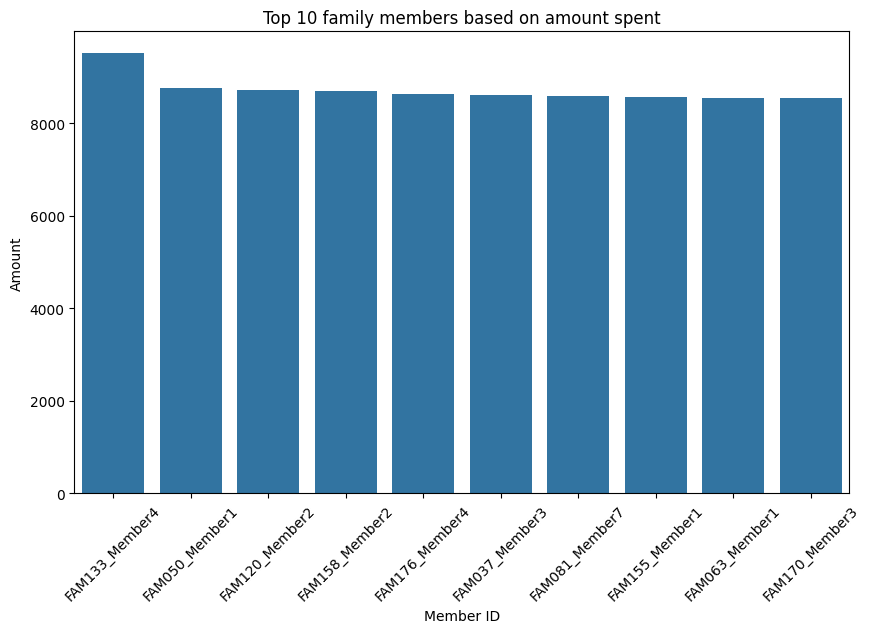

In [47]:
# Visualize top 10 family members based on amount spent
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_family_members, x='Member ID', y='Amount')
plt.title('Top 10 family members based on amount spent')
plt.xlabel('Member ID')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

In [48]:
bottom_10_family_members=family_member_spending.nsmallest(10,'Amount')
bottom_10_family_members

,Family ID,Member ID,Amount
687,FAM150,FAM150_Member4,508.56
412,FAM090,FAM090_Member6,561.12
109,FAM025,FAM025_Member2,663.07
452,FAM099,FAM099_Member4,786.83
294,FAM064,FAM064_Member3,826.39
34,FAM008,FAM008_Member1,887.77
656,FAM143,FAM143_Member5,952.32
403,FAM089,FAM089_Member2,991.01
85,FAM018,FAM018_Member6,995.19
208,FAM045,FAM045_Member3,1037.82


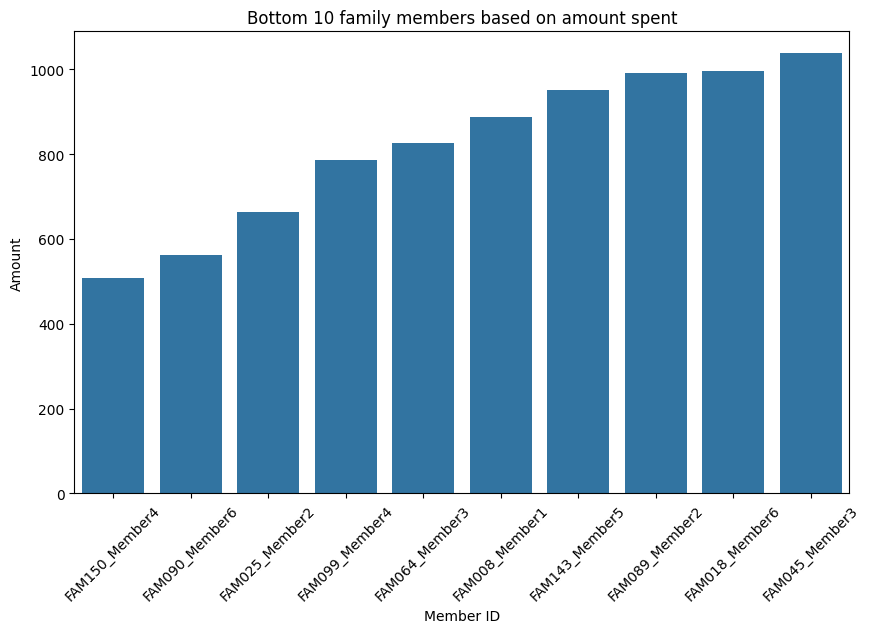

In [49]:
# Visualize bottom 10 family members based on amount spent
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_10_family_members, x='Member ID', y='Amount')
plt.title('Bottom 10 family members based on amount spent')
plt.xlabel('Member ID')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

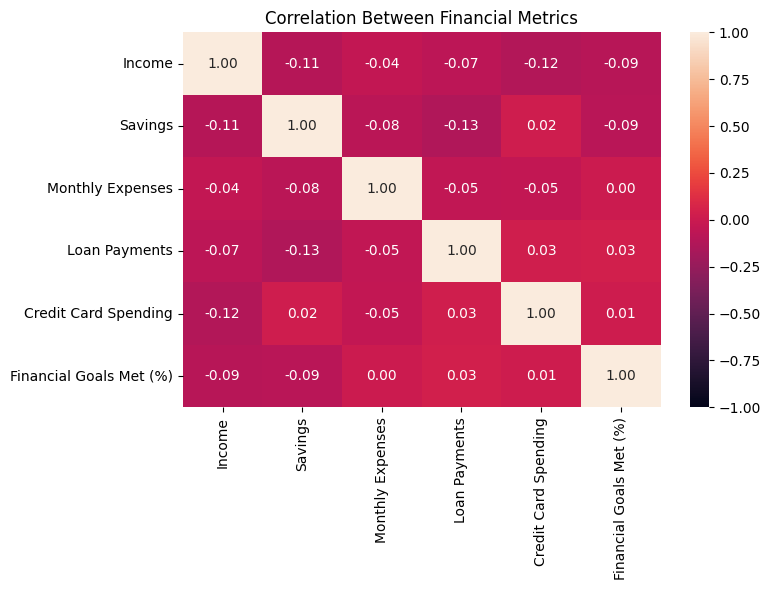

In [58]:
# Correlation heatmap for financial metrics
financial_metrics = ['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending','Financial Goals Met (%)']
correlation_matrix = df[financial_metrics].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, vmin = -1, vmax = 1, fmt=".2f")
plt.title("Correlation Between Financial Metrics")
plt.tight_layout()
plt.show()


In [51]:
def calculate_financial_score(row):
    # Avoid division by zero
    income = row['Income'] if row['Income'] > 0 else 1

    # Calculate individual factors
    savings_ratio = (row['Savings'] / income) * 100
    expenses_ratio = (row['Monthly Expenses'] / income) * 100
    loan_ratio = (row['Loan Payments'] / income) * 100
    credit_card_trend =(row['Credit Card Spending']/income)  # Example metric
    financial_goals_met = row['Financial Goals Met (%)']

    # Penalize specific spending categories (e.g., Travel/Entertainment)
    travel_entertainment_ratio = (row['Travel & Entertainment Expenses'] / income) * 100
    category_penalty = max(0, travel_entertainment_ratio - 20)  # Penalize if exceeds 20% of income

    # Combine factors using weights
    score = (
        0.3 * savings_ratio +
        0.25 * (100 - expenses_ratio) +
        0.2 * (100 - loan_ratio) +
        0.1 * credit_card_trend +
        0.1 * (100 - category_penalty) +
        0.05 * financial_goals_met
    )

    # Ensure the score is between 0 and 100
    return min(max(score, 0), 100)

# Apply the scoring model to each family
family_spending['Financial_Score'] =family_spending.apply(calculate_financial_score, axis=1)

# Display the updated dataset with scores
family_spending[['Family ID', 'Financial_Score']].head()


,Family ID,Financial_Score
0,FAM001,62.040725
1,FAM002,72.650375
2,FAM003,65.659649
3,FAM004,65.396753
4,FAM005,57.773525


In [52]:
family_spending[['Family ID', 'Financial_Score']].sort_values(by='Financial_Score', ascending=False)

,Family ID,Financial_Score
187,FAM188,97.345737
60,FAM061,92.319174
79,FAM080,91.166181
24,FAM025,90.155643
78,FAM079,89.479497
...,...,...
27,FAM028,56.040029
151,FAM152,55.809509
111,FAM112,55.565342
174,FAM175,55.311809


In [53]:
top_10_families = family_spending.nlargest(10, 'Financial_Score')
top_10_families

,Family ID,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Financial Goals Met (%),Travel & Entertainment Expenses,Financial_Score
187,FAM188,13519.37,31504.0,45250.0,3704.0,885.0,2241.0,55.0,3721.19,97.345737
60,FAM061,6426.06,35695.0,43590.0,3808.0,994.0,2774.0,78.0,1481.23,92.319174
79,FAM080,16800.13,36006.0,42359.0,2323.0,4270.0,2754.0,97.0,4334.39,91.166181
24,FAM025,35138.01,33478.0,40252.0,1600.0,3876.0,2480.0,65.0,8910.69,90.155643
78,FAM079,26756.38,39116.0,47389.0,3145.0,2271.0,2242.0,26.0,7211.27,89.479497
168,FAM169,26135.55,36175.0,38957.0,1947.0,2025.0,2760.0,73.0,8867.40,88.048397
53,FAM054,22204.56,42676.0,48836.0,5532.0,1792.0,541.0,29.0,7772.03,86.701057
199,FAM200,24887.93,44621.0,44081.0,4296.0,2470.0,2831.0,92.0,8907.59,85.729246
38,FAM039,17810.65,30851.0,32849.0,6763.0,2005.0,2052.0,99.0,5029.34,85.119369
104,FAM105,13069.12,39358.0,44187.0,6587.0,3406.0,1431.0,42.0,4662.92,84.869655


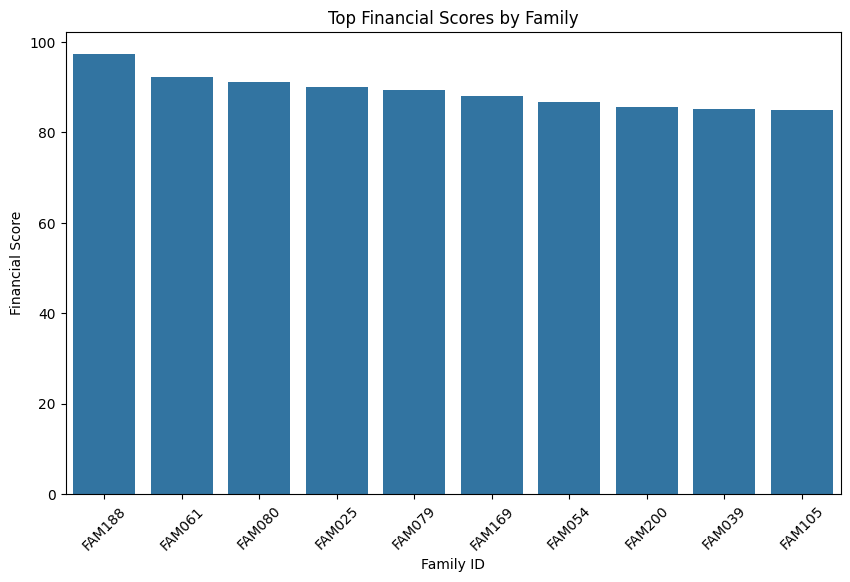

In [54]:
# Visualize top 10 family financial scores
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_families, x='Family ID', y='Financial_Score')
plt.title('Top Financial Scores by Family')
plt.xlabel('Family ID')
plt.ylabel('Financial Score')
plt.xticks(rotation=45)
plt.show()


In [55]:
bottom_10_families = family_spending.nsmallest(10, 'Financial_Score')
bottom_10_families

,Family ID,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Financial Goals Met (%),Travel & Entertainment Expenses,Financial_Score
76,FAM077,26127.03,55203.0,1471.0,2071.0,2123.0,2674.0,21.0,7622.58,55.147194
174,FAM175,18876.28,133819.0,4286.0,6806.0,3879.0,2932.0,24.0,5462.19,55.311809
111,FAM112,29669.80,51417.0,4550.0,6084.0,4716.0,1623.0,54.0,8997.35,55.565342
151,FAM152,29130.57,127647.0,1141.0,3712.0,3724.0,2345.0,37.0,9082.63,55.809509
27,FAM028,7397.16,123850.0,2276.0,5144.0,2324.0,2926.0,38.0,2805.36,56.040029
195,FAM196,31433.34,64973.0,3604.0,3533.0,622.0,744.0,26.0,6416.63,56.414346
23,FAM024,14198.89,108907.0,1037.0,1819.0,4187.0,2704.0,57.0,4706.90,56.951668
167,FAM168,25743.73,129061.0,4832.0,5189.0,254.0,1211.0,39.0,7847.54,57.029622
140,FAM141,24475.84,115909.0,7112.0,4264.0,222.0,1744.0,23.0,9103.92,57.034266
82,FAM083,8765.74,131327.0,5417.0,6780.0,2249.0,2358.0,49.0,2719.23,57.056066


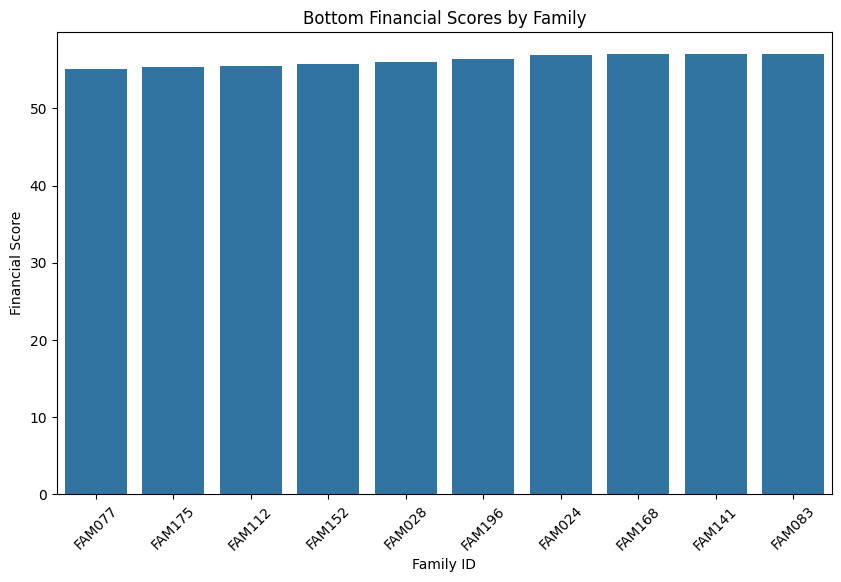

In [56]:
# Visualize bottom 10 family financial scores
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_10_families, x='Family ID', y='Financial_Score')
plt.title('Bottom Financial Scores by Family')
plt.xlabel('Family ID')
plt.ylabel('Financial Score')
plt.xticks(rotation=45)
plt.show()